In [1]:
%matplotlib inline

import itertools
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load votes

In [2]:
JSON_DATAPATH = 'votes/impact_dao_votes.json'

records = []
with open(JSON_DATAPATH, 'r+') as json_file:
    data = json.load(json_file)
    for proposal in data:
        votes = proposal['votes']
        for v in votes:
            records.append({
                'proposal': proposal['proposal'],
                'voter': v['voter'],
                'vp': v['vp'],
                'choice': str(v['choice']),
                'dao': v['space']['id']
            })
df = pd.DataFrame.from_records(records)
len(df)

75745

In [3]:
df['voter'].value_counts()

0xE7CF8Fce5e83e07e56E2EBfEb7651f459c47217b    75
0x06c4865ab16c9C760622f19a313a2E637E2e66a2    71
0x0B1f8Ee2f813f06aC5fb8aad74AaCB71fb2f51FA    64
0x4131826eaFDCb7dcd855Fae9098EC693165F157d    62
0x2FC3Fd7c06aDfc48736122ea33820038CC16DcDb    60
                                              ..
0x4122E8a3749b07Ee2a2E96f08b629F88C3d68b0E     1
0xA07161106423845E2A7Ff82Ab17fc19a1FD1Babe     1
0xaa66E6ed18F7A9066734f8A51c2e92A63131a9f7     1
0x42026B52807EEAF50D9F0EB4c7781401095E5e1B     1
0xFE53E594f981e234FCc5e33d3C37943C81766485     1
Name: voter, Length: 15166, dtype: int64

# Analysis on voter trends

Text(0, 0.5, '# Wallet Addresses')

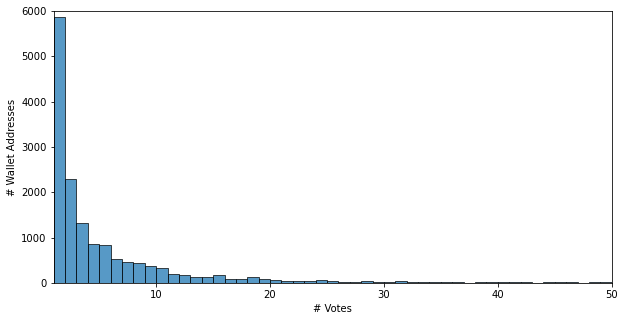

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

voter_counts = df['voter'].value_counts()
voter_counts.name = "# Votes"
sns.histplot(voter_counts, binwidth=1, ax=ax)
ax.set_xlim(1,50)
ax.set_ylim(0,6000)
ax.set_ylabel('# Wallet Addresses')

Text(0, 0.5, '# Wallet Addresses')

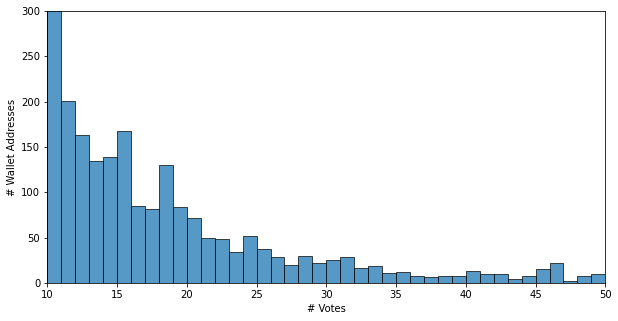

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

voter_counts = df['voter'].value_counts()
voter_counts.name = "# Votes"
sns.histplot(voter_counts, binwidth=1, ax=ax)
ax.set_xlim(10,50)
ax.set_ylim(0,300)
ax.set_ylabel('# Wallet Addresses')

# DAO connections

In [6]:
dao_connections = pd.crosstab(df['voter'], df['dao'])
daoers = dao_connections.apply(lambda x: x>0).sum(axis=1)
wallet_order = daoers.sort_values(ascending=False).index
dao_connections = dao_connections.reindex(wallet_order)
wallets = (dao_connections.apply(lambda x: x>0).sum(axis=1) > 1)
dao_connections = dao_connections[wallets]

cols = [c for c, x in dao_connections.sum(axis=0).sort_values(ascending=False).items() if x>1] 
dao_connections = dao_connections[cols]
len(dao_connections)

450

[]

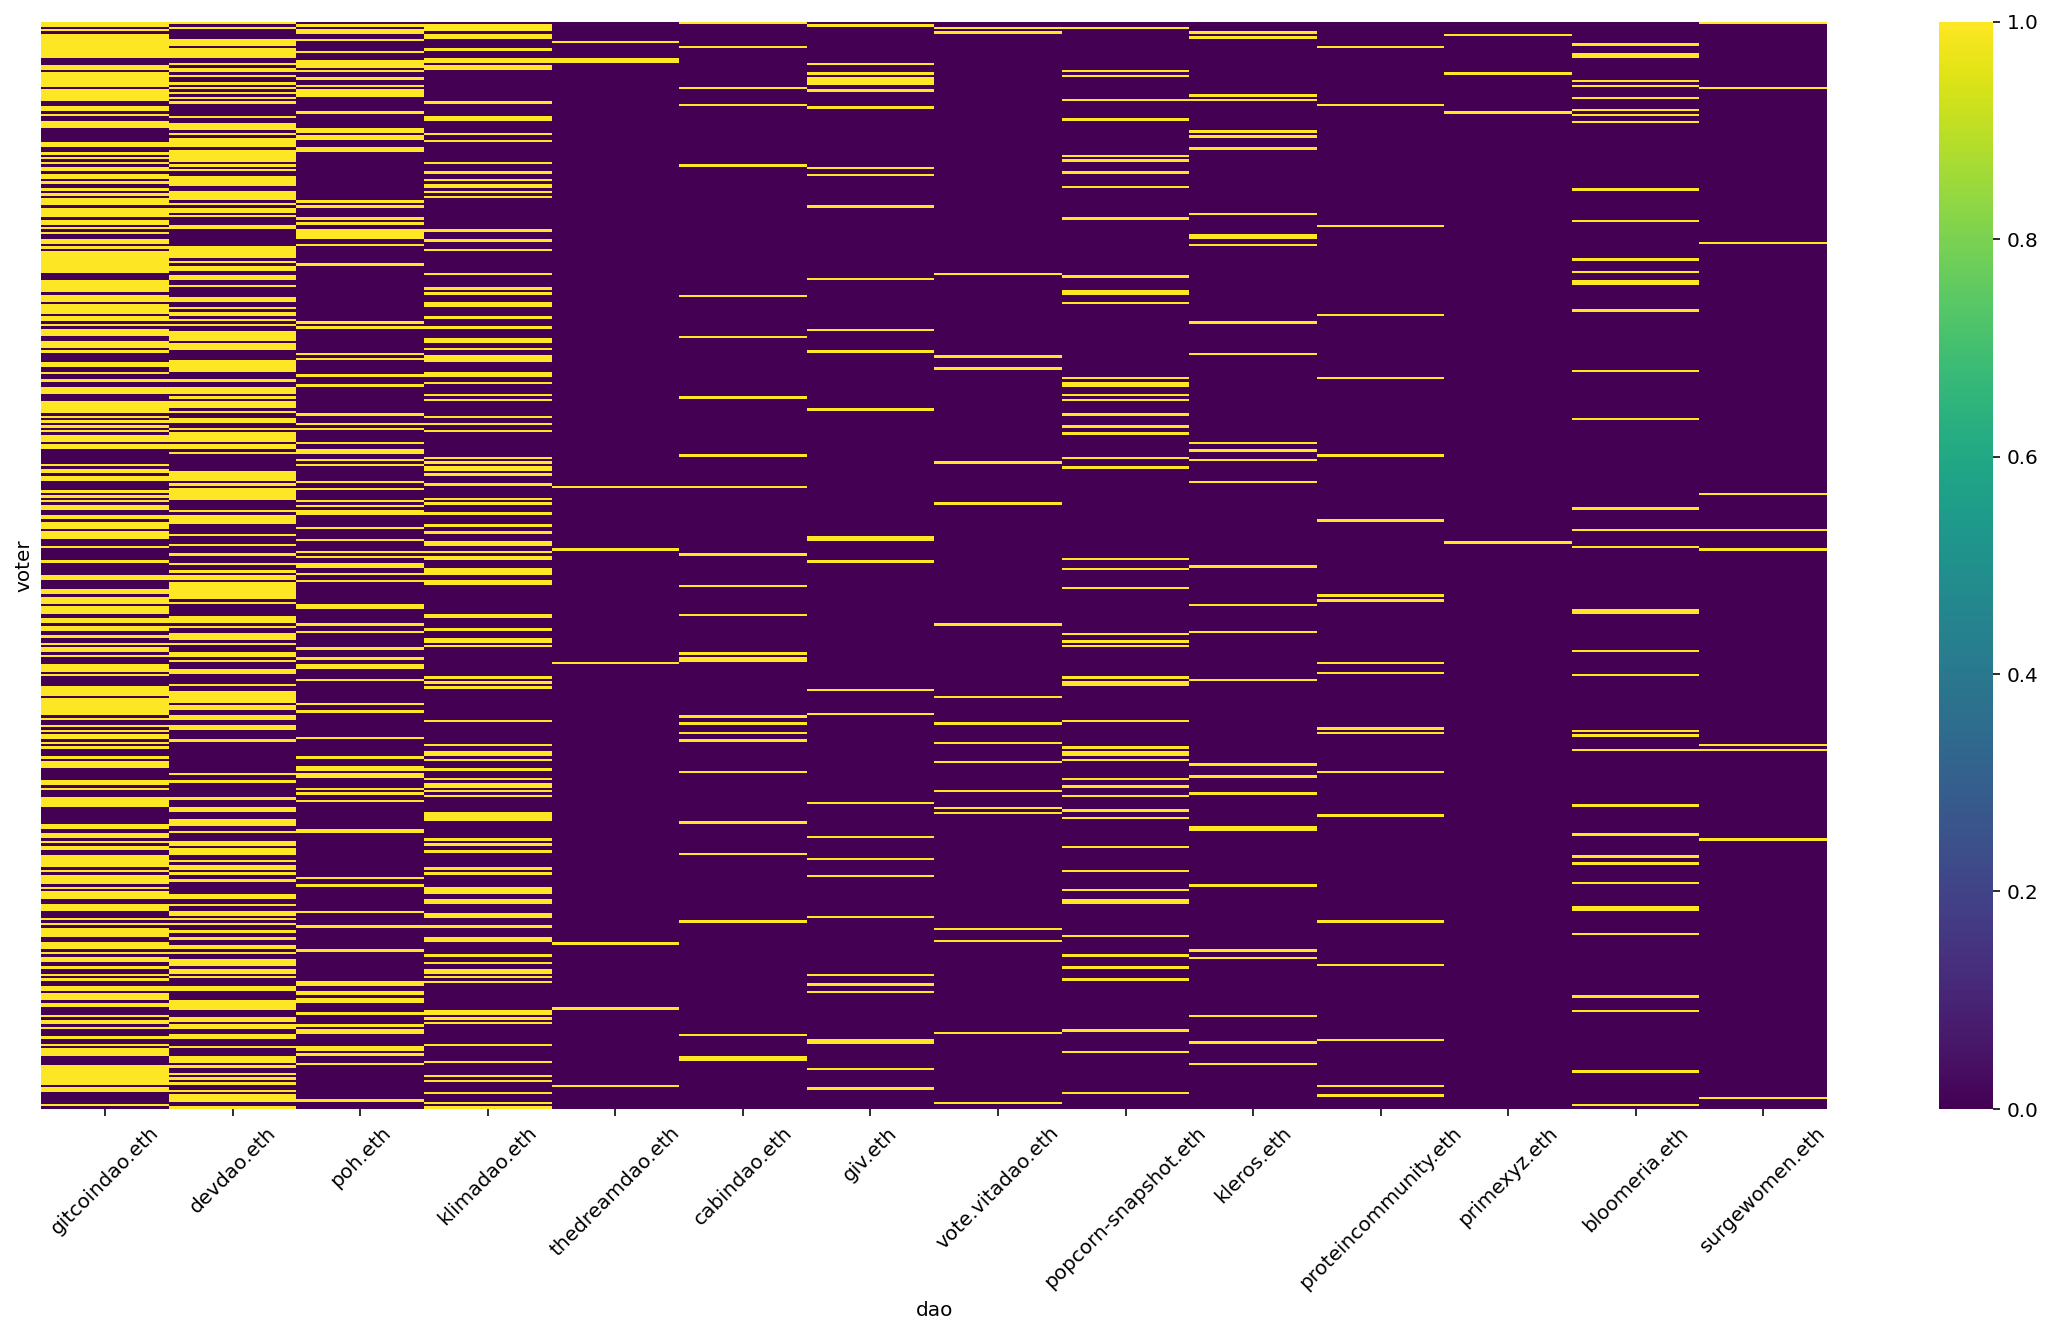

In [7]:
fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi=144)
sns.heatmap(
    dao_connections, 
    cmap='viridis',
    ax=ax,
    vmax=1,
    #linecolor='black',
    #linewidths=.01
)
plt.xticks(rotation=45)
ax.set_yticks([])

## Make a network graph of DAO-to-DAO connections

In [8]:
import networkx as nx

In [9]:
connections = []
for voter, row in dao_connections.iterrows():
    dao_list = [dao for dao, count in row.items() if count > 0]        
    connections.extend(list(itertools.combinations(dao_list,2)))    

In [10]:
nodes = dao_connections.apply(lambda x: x>0).sum(axis=0)
#edges = pd.DataFrame(connections, columns=['source', 'target'])

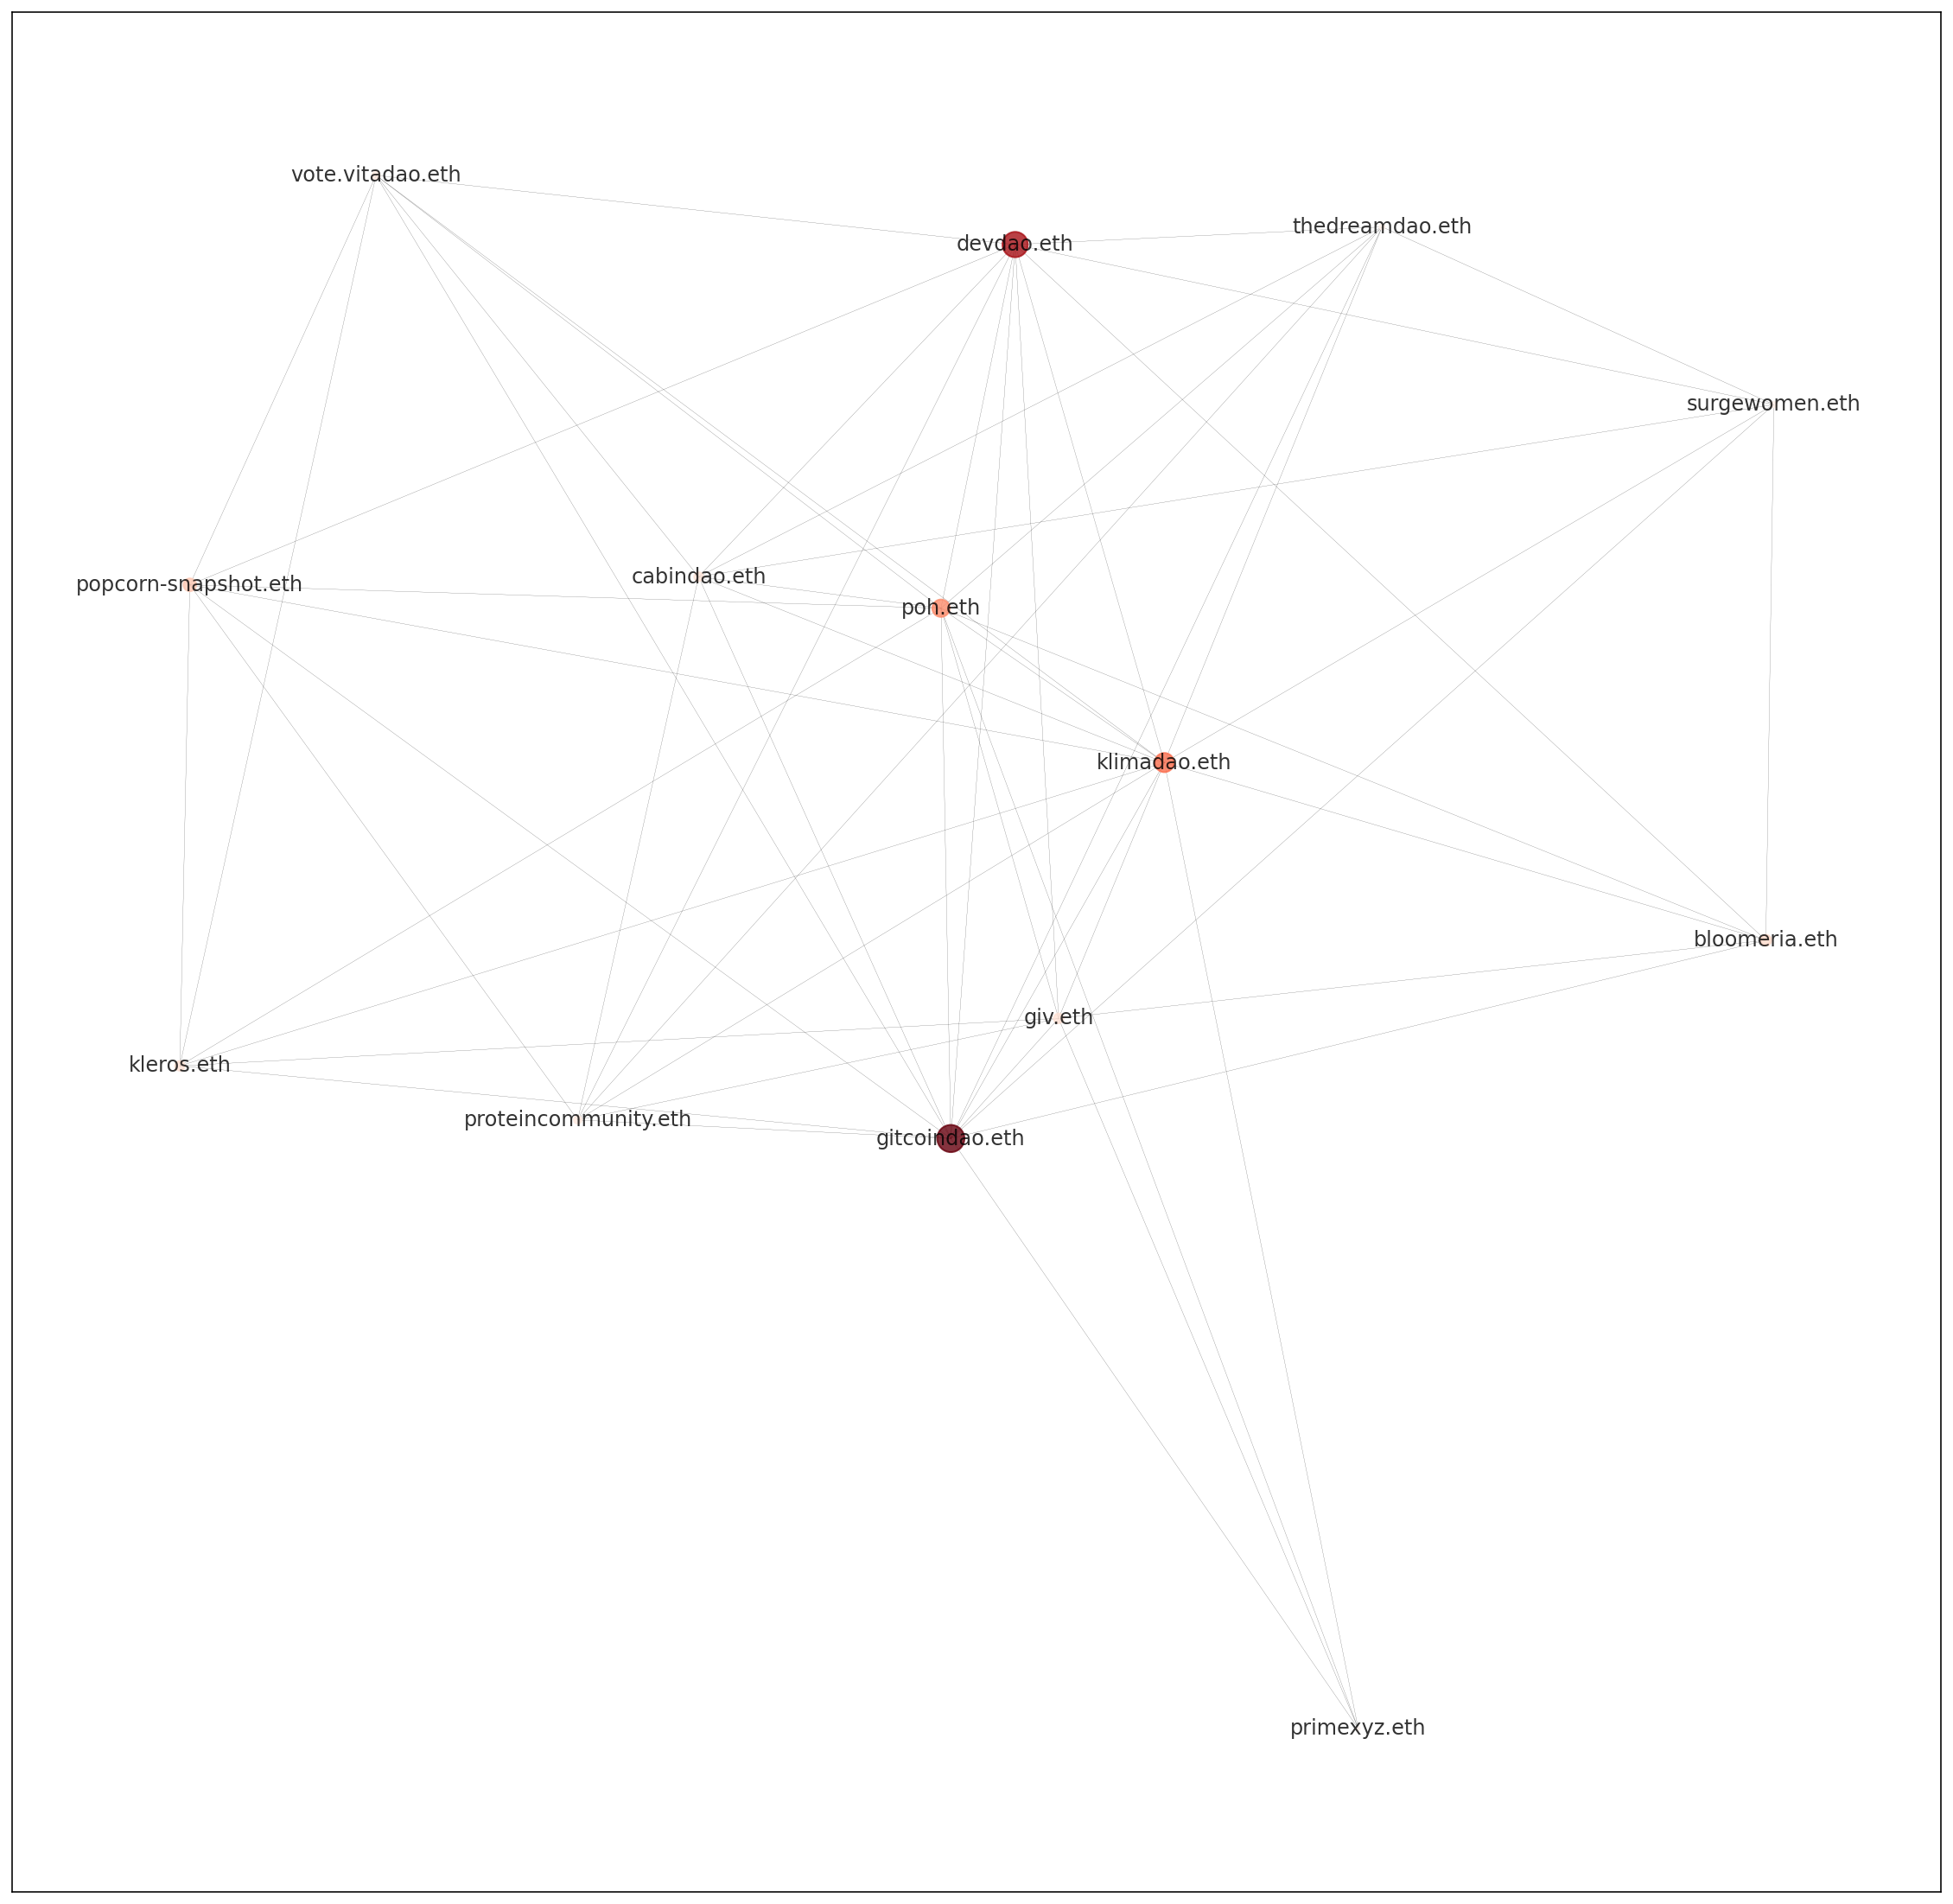

In [11]:
G = nx.Graph()
G.add_nodes_from(nodes.index)
G.add_edges_from(connections)
pos = nx.spring_layout(G, k=1, dim=2)

f, ax = plt.subplots(figsize=(20, 20), dpi=144)
nx.draw_networkx(
    G=G, 
    pos=pos,
    cmap='Reds',
    node_color=nodes,
    width=.1,
    node_size=nodes,
    with_labels=True,
    alpha=0.8)